## Multi-Armed Bandit

In [1]:
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt

In [2]:
n = 10
probs = np.random.rand(n)
eps = 0.2

In [18]:
def get_reward(prob, n=10):
    reward = 0
    for i in range(n):
        if random.random() < prob:
            reward += 1
    return reward

In [29]:
reward_test = [get_reward(0.7) for _ in range(100000)]
np.mean(reward_test)

7.00016

(array([9.0000e+00, 1.3700e+02, 9.1000e+02, 3.6240e+03, 1.0408e+04,
        2.0064e+04, 2.6593e+04, 2.3175e+04, 1.5080e+04]),
 array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
         5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ]),
 <a list of 9 Patch objects>)

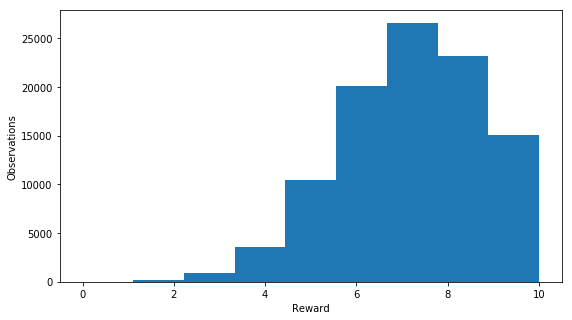

In [30]:
plt.figure(figsize=(9,5))
plt.xlabel("Reward")
plt.ylabel("Observations")
plt.hist(reward_test, bins = 9)

### Greedy-Epsilon Method

In [34]:
def update_record(record, action, r):
    new_r = (record[action, 0] * record[action, 1] + r) / (record[action, 0] + 1)
    record[action, 0] += 1
    record[action, 1] = new_r
    return record

In [38]:
def get_best_arm(record):
    arm_index = np.argmax(record[:, 1], axis = 0)
    return arm_index

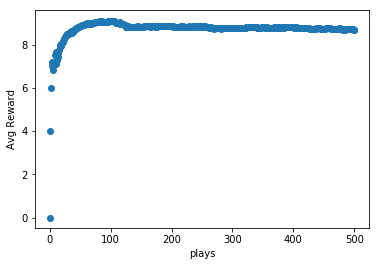

In [47]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel("plays")
ax.set_ylabel("Avg Reward")
record = np.zeros((n,2))
probs = np.random.rand(n)
eps = 0.2
rewards = [0]
for i in range(500):
    if random.random() > eps:
        choice = get_best_arm(record)
    else:
        choice = np.random.randint(10)
    
    r = get_reward(probs[choice])
    record = update_record(record, choice, r)
    mean_reward = ((i+1) * rewards[-1] + r) / (i+2)
    rewards.append(mean_reward)
ax.scatter(np.arange(len(rewards)), rewards)

### Softmax Method

In [52]:
def softmax(av, tau=1.2):
    softm = np.exp(av/tau) / np.sum(np.exp(av/tau))
    return softm

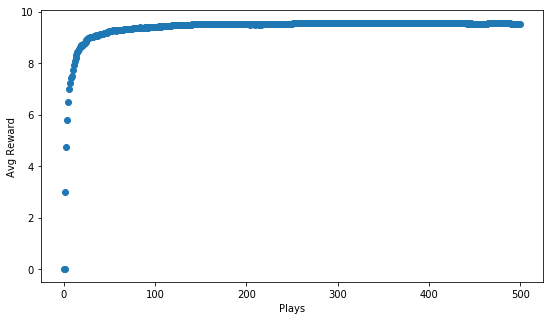

In [53]:
n = 10
probs = np.random.rand(n)
record = np.zeros((n,2))

fig, ax = plt.subplots(1,1)
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")
fig.set_size_inches(9,5)
rewards = [0]
for i in range(500):
    p = softmax(record[:,1])
    choice = np.random.choice(np.arange(n), p=p)
    r = get_reward(probs[choice])
    record = update_record(record, choice, r)
    mean_reward = ((i+1)*rewards[-1] + r) / (i+2)
    rewards.append(mean_reward)
ax.scatter(np.arange(len(rewards)), rewards)